In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Resources/sales.csv')
df.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#drop unneed columns
df_clean = df.drop(columns=['Order ID', 'Row ID','Customer ID', 'Segment', 'City',  'Product ID', 'Product Name'], axis=1)
df_clean.head()

,Order Date,State,Region,Category,Sub-Category,Sales
0,08/11/2017,Kentucky,South,Furniture,Bookcases,261.9600
1,08/11/2017,Kentucky,South,Furniture,Chairs,731.9400
2,12/06/2017,California,West,Office Supplies,Labels,14.6200
3,11/10/2016,Florida,South,Furniture,Tables,957.5775
4,11/10/2016,Florida,South,Office Supplies,Storage,22.3680


In [4]:
#change to datetime
df_clean['Order Date']= pd.to_datetime(df['Order Date'])

In [5]:
#sort by dates
df_clean.sort_values(by =[ 'Region', 'Order Date'])

,Order Date,State,Region,Category,Sub-Category,Sales
540,2015-01-02,Wisconsin,Central,Technology,Accessories,468.900
6547,2015-01-03,Illinois,Central,Furniture,Chairs,634.116
6548,2015-01-03,Illinois,Central,Office Supplies,Paper,17.472
7947,2015-01-03,Texas,Central,Office Supplies,Fasteners,18.840
7948,2015-01-03,Texas,Central,Furniture,Chairs,362.250
...,...,...,...,...,...,...
5456,2018-12-29,Washington,West,Office Supplies,Fasteners,19.600
5457,2018-12-29,Washington,West,Furniture,Furnishings,68.460
1296,2018-12-30,California,West,Office Supplies,Binders,13.904
1297,2018-12-30,California,West,Office Supplies,Binders,20.720


In [6]:
#group by days and total sales for day
national = df_clean.groupby(['Order Date']).sum().reset_index()

In [7]:
#reformat column headings to match prophet
national.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)

In [8]:
national_model = Prophet(seasonality_mode='multiplicative').fit(national)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
national_future = national_model.make_future_dataframe(periods=3, freq='MS')

In [10]:
national_forecast = national_model.predict(national_future)
national_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#save to a csv
national_forecast.to_csv(r'Resources/national_forecast.csv', index=False)

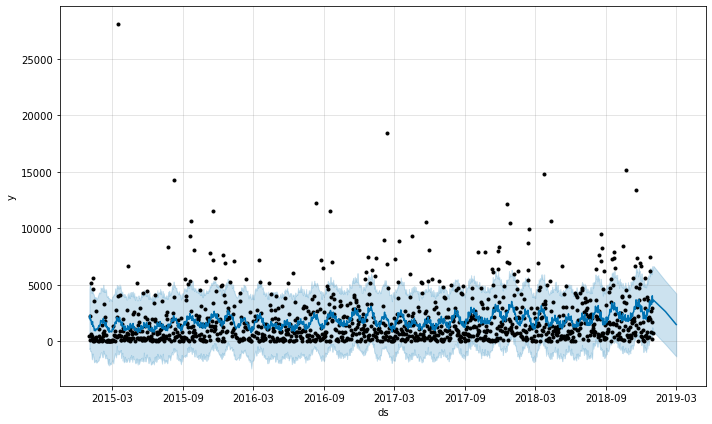

In [11]:
#plot the model for central region
fig1 = national_model.plot(national_forecast)

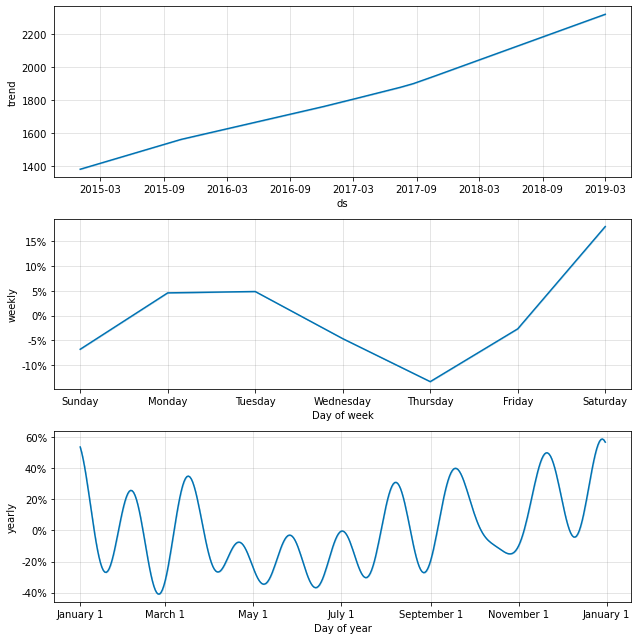

In [12]:
fig2 = national_model.plot_components(national_forecast)

In [13]:
### Explore trends in sales by category
df.drop_duplicates(subset = ["Category"])

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960
2,3,CA-2017-138688,12/06/2017,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
7,8,CA-2015-115812,09/06/2015,BH-11710,Consumer,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152


In [14]:
# seperate df by category
df_furniture = df_clean.loc[df_clean['Category']=='Furniture']
df_office_supplies = df_clean.loc[df_clean['Category']=='Office Supplies']
df_technology = df_clean.loc[df_clean['Category']=='Technology']


In [15]:
#group by days and total sales for day
furniture = df_furniture.groupby(['Order Date']).sum().reset_index()
office_supplies = df_office_supplies.groupby(['Order Date']).sum().reset_index()
technology = df_technology.groupby(['Order Date']).sum().reset_index()


In [16]:
#reformat column headings to match prophet
furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
#reformat column headings to match prophet
office_supplies.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
#reformat column headings to match prophet
technology.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)

In [17]:
furniture_model = Prophet(seasonality_mode='multiplicative').fit(furniture)
office_supplies_model = Prophet(seasonality_mode='multiplicative').fit(office_supplies)
technology_model = Prophet(seasonality_mode='multiplicative').fit(technology)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
furniture_future = furniture_model.make_future_dataframe(periods=3, freq='MS')
office_supplies_future = office_supplies_model.make_future_dataframe(periods=3, freq='MS')
technology_future = technology_model.make_future_dataframe(periods=3, freq='MS')

In [19]:
furniture_forecast = furniture_model.predict(furniture_future)

#save to a csv
furniture_forecast.to_csv(r'Resources/furnitur_forecast.csv', index=False)

furniture_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
875,2018-12-29,1498.042373,257.284154,2799.722332
876,2018-12-30,1191.491643,-113.945230,2417.676396
877,2019-01-01,1394.340827,132.306603,2721.726813
878,2019-02-01,768.917495,-373.161397,1981.960723
879,2019-03-01,677.945411,-554.931664,1982.162895


In [20]:
office_supplies_forecast = office_supplies_model.predict(office_supplies_future)

#save to a csv
office_supplies_forecast.to_csv(r'Resources/office_supplies_forecast.csv', index=False)

office_supplies_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1141,2018-12-29,1363.293038,107.249830,2582.282017
1142,2018-12-30,1154.031945,-55.387604,2412.810662
1143,2019-01-01,1319.265934,59.858911,2591.538934
1144,2019-02-01,707.008763,-489.216733,1959.900287
1145,2019-03-01,791.002706,-422.034365,2054.337156


In [21]:
technology_forecast = technology_model.predict(technology_future)

#save to a csv
technology_forecast.to_csv(r'Resources/technology_forecast.csv', index=False)

technology_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
817,2018-12-29,1626.424286,-773.861823,3834.725615
818,2018-12-30,1570.726649,-741.528378,3937.685888
819,2019-01-01,1324.590838,-907.386063,3604.260134
820,2019-02-01,1623.319951,-801.207790,3961.902738
821,2019-03-01,789.072252,-1432.943218,3058.492051


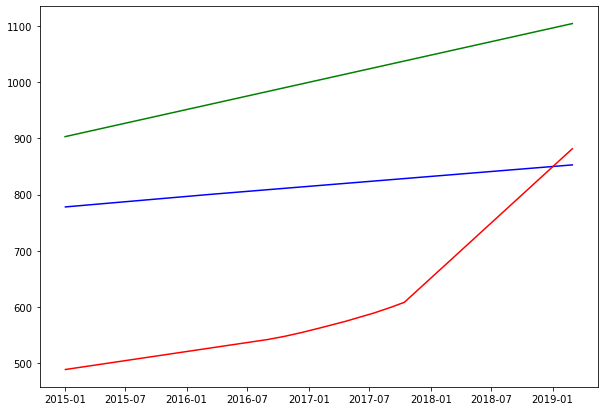

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(furniture_forecast['ds'], furniture_forecast['trend'], 'b-')
plt.plot(office_supplies_forecast['ds'], office_supplies_forecast['trend'], 'r-')
plt.plot(technology_forecast['ds'], technology_forecast['trend'], 'g-')